# TELECOM CHURN PREDICTION

## 1. IMPORT RELEVANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For machine learning modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# For ignoring warnings in case of version issues
import warnings
warnings.filterwarnings('ignore')

## 2. LOAD THE DATASET

In [2]:
df = pd.read_csv("churn_all.csv")

Quick check of the data structure:

In [3]:
df.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          5000 non-null   object 
 1   area_code                      5000 non-null   int64  
 2   phone_number                   5000 non-null   object 
 3   international_plan             5000 non-null   object 
 4   voice_mail_plan                5000 non-null   object 
 5   number_vmail_messages          5000 non-null   int64  
 6   total_day_minutes              5000 non-null   float64
 7   total_day_calls                5000 non-null   int64  
 8   total_day_charge               5000 non-null   float64
 9   total_eve_minutes              5000 non-null   float64
 10  total_eve_calls                5000 non-null   int64  
 11  total_eve_charge               5000 non-null   float64
 12  total_night_minutes            5000 non-null   f

In [5]:
duplicated_phone_numbers = df['phone_number'].duplicated().any()
print(duplicated_phone_numbers)

False


In [6]:
df.describe().round(2)

,area_code,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,436.91,7.76,180.29,119.83,30.65,200.64,100.19,17.05,200.39,99.92,9.02,10.26,4.44,2.77,1.57
std,42.21,13.55,53.89,442.74,9.16,50.55,19.83,4.30,50.53,19.96,2.27,2.76,2.46,0.75,1.31
min,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,408.00,0.00,143.70,87.00,24.43,166.38,87.00,14.14,166.90,87.00,7.51,8.50,3.00,2.30,1.00
50%,415.00,0.00,180.10,100.00,30.62,201.00,100.00,17.09,200.40,100.00,9.02,10.30,4.00,2.78,1.00
75%,415.00,17.00,216.20,113.00,36.75,234.10,114.00,19.90,234.70,113.00,10.56,12.00,6.00,3.24,2.00
max,510.00,52.00,351.50,9999.00,59.76,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


There is no missing data in the dataset, and there is no duplicated phone numbers. The dataset contains 5000 rows and 21 columns. The target variable is 'Churn' and the rest of the columns are the features.

## 3. DATA PREPARATION & CLEANING

### 3.1. Drop irrelevant columns

In [7]:
columns_to_drop = ["state", "phone_number"]

df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

In [8]:
df.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 3.2. Convert Categorical Variables to numeric

In [9]:
print(df['Churn'].unique())

[False  True]


In [10]:
df["Churn"] = df["Churn"].map({True: 1, False: 0})

In [11]:
print(df['Churn'].unique())

[0 1]


In [12]:
print(df['voice_mail_plan'].unique())
print(df['international_plan'].unique())

[' yes' ' no']
[' no' ' yes']


In [13]:
columns_to_map = ["international_plan", "voice_mail_plan"]

value_mapping = {"yes": 1, "no": 0}

for column in columns_to_map:
    if column in df.columns: 
        df[column] = df[column].str.strip().map(value_mapping)

In [14]:
df.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


### 3.3. Check if telephone area code (prefix) code is relevant

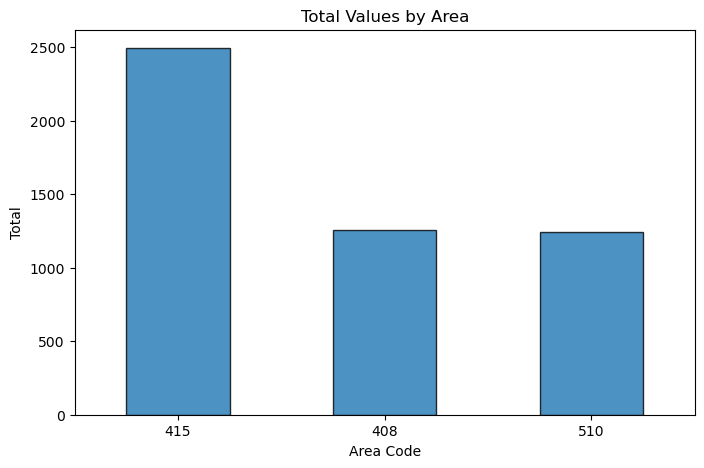

In [15]:
area_code_counts = df['area_code'].value_counts()

# Bar chart with the total count of each 'area_code' value
plt.figure(figsize=(8, 5))
area_code_counts.plot(kind='bar', alpha=0.8, edgecolor='black')
plt.title("Total Values by Area")
plt.xlabel("Area Code")
plt.ylabel("Total")
plt.xticks(rotation=0)
plt.show()

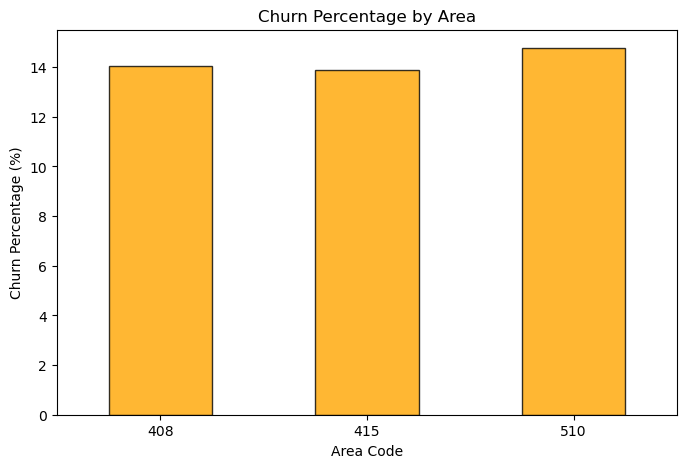

In [16]:
churn_percentage = (
    df[df['Churn'] == 1]
    .groupby('area_code')
    .size()
    .div(df.groupby('area_code').size())
    .mul(100)
    .sort_index()
)

plt.figure(figsize=(8, 5))
churn_percentage.plot(kind='bar', alpha=0.8, color='orange', edgecolor='black')
plt.title("Churn Percentage by Area")
plt.xlabel("Area Code")
plt.ylabel("Churn Percentage (%)")
plt.xticks(rotation=0)
plt.show()

Conclusion: Area code is not relevant for churn, so we can drop it.

In [17]:
df.drop(columns=['area_code'])

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,1,40,235.7,127,40.07,223.0,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,0,0,0,184.2,90,31.31,256.8,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,0,0,0,140.6,89,23.90,172.8,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,0,0,0,188.8,67,32.10,171.7,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


### 3.4. Feature Engineering

New feature to understand the total number of calls made by the customer:

In [18]:
# New feature: 'total_minutes'
df['total_minutes'] = (
    df['total_day_minutes'] +
    df['total_eve_minutes'] +
    df['total_night_minutes'] +
    df['total_intl_minutes']
)

# New feature: 'total_calls'
df['total_calls'] = (
    df['total_day_calls'] +
    df['total_eve_calls'] +
    df['total_night_calls'] +
    df['total_intl_calls']
)

# New feature: 'total_charge'
df['total_charge'] = (
    df['total_day_charge'] +
    df['total_eve_charge'] +
    df['total_night_charge'] +
    df['total_intl_charge']
)

# New feature: 'avg_minutes_per_call'
df['avg_minutes_per_call'] = df['total_minutes'] / df['total_calls']

In [19]:
columns = [col for col in df.columns if col != 'Churn'] + ['Churn']
df = df[columns]

In [20]:
df.head()

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,avg_minutes_per_call,Churn
0,415,0,1,25,265.1,110,45.07,197.4,99,16.78,...,11.01,10.0,3,2.70,1,717.2,303,75.56,2.366997,0
1,415,0,1,26,161.6,123,27.47,195.5,103,16.62,...,11.45,13.7,3,3.70,1,625.2,332,59.24,1.883133,0
2,415,0,0,0,243.4,114,41.38,121.2,110,10.30,...,7.32,12.2,5,3.29,0,539.4,333,62.29,1.619820,0
3,408,1,0,0,299.4,71,50.90,61.9,88,5.26,...,8.86,6.6,7,1.78,2,564.8,255,66.80,2.214902,0
4,415,1,0,0,166.7,113,28.34,148.3,122,12.61,...,8.41,10.1,3,2.73,3,512.0,359,52.09,1.426184,0


In [21]:
df.describe().round(2)

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,avg_minutes_per_call,Churn
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,...,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,436.91,0.09,0.26,7.76,180.29,119.83,30.65,200.64,100.19,17.05,...,9.02,10.26,4.44,2.77,1.57,591.58,324.38,59.49,1.96,0.14
std,42.21,0.29,0.44,13.55,53.89,442.74,9.16,50.55,19.83,4.30,...,2.27,2.76,2.46,0.75,1.31,89.07,443.35,10.35,0.38,0.35
min,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,284.30,191.00,22.93,0.06,0.00
25%,408.00,0.00,0.00,0.00,143.70,87.00,24.43,166.38,87.00,14.14,...,7.51,8.50,3.00,2.30,1.00,531.20,282.00,52.48,1.70,0.00
50%,415.00,0.00,0.00,0.00,180.10,100.00,30.62,201.00,100.00,17.09,...,9.02,10.30,4.00,2.78,1.00,592.40,305.00,59.51,1.94,0.00
75%,415.00,0.00,1.00,17.00,216.20,113.00,36.75,234.10,114.00,19.90,...,10.56,12.00,6.00,3.24,2.00,652.02,328.00,66.39,2.20,0.00
max,510.00,1.00,1.00,52.00,351.50,9999.00,59.76,363.70,170.00,30.91,...,17.77,20.00,20.00,5.40,9.00,885.00,10266.00,96.15,3.73,1.00


## 4. EXPLORATORY DATA ANALYSIS

We will do a quick correlation check with a heatmap to see the relationships:

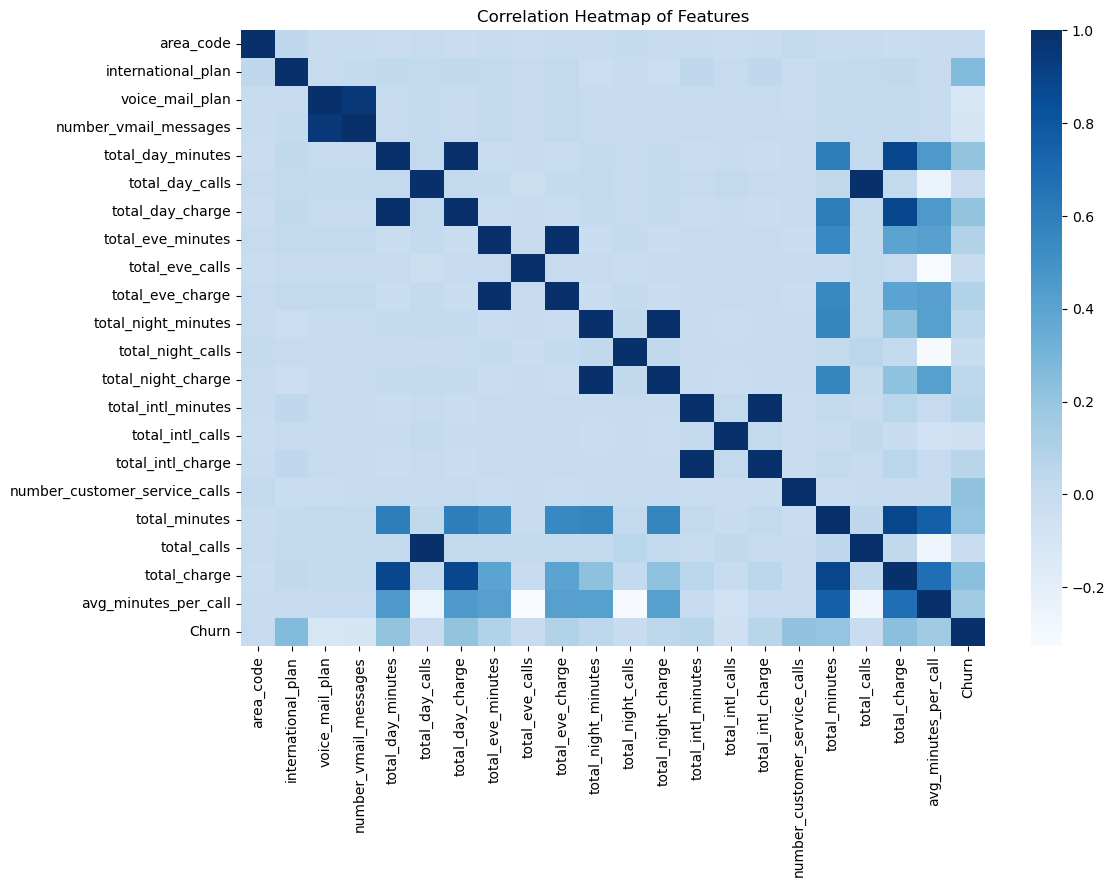

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='Blues', annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

We might want to see how 'churn' relates to certain key variables:

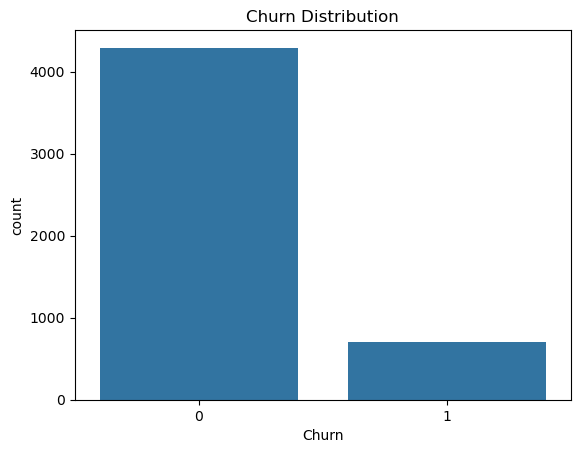

In [23]:
sns.countplot(data=df, x='Churn')
plt.title("Churn Distribution")
plt.show()

By domain knowledge, we suspect:
- customers with international_plan might churn more
- customers calling customer service more often might churn more

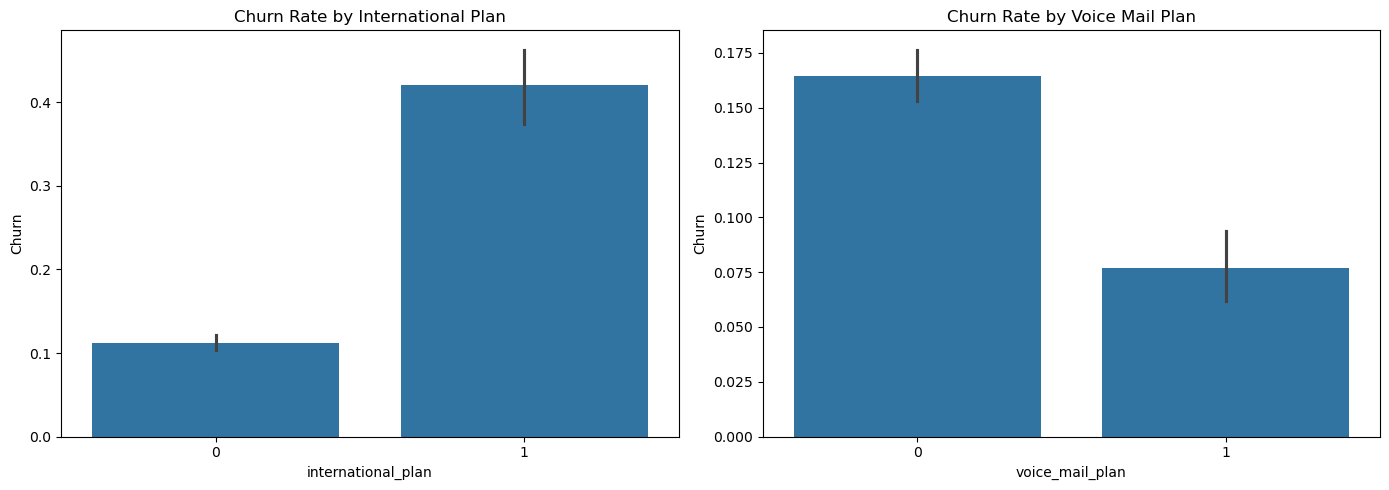

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))
sns.barplot(x='international_plan', y='Churn', data=df, ax=ax[0])
ax[0].set_title("Churn Rate by International Plan")
sns.barplot(x='voice_mail_plan', y='Churn', data=df, ax=ax[1])
ax[1].set_title("Churn Rate by Voice Mail Plan")
plt.tight_layout()
plt.show()

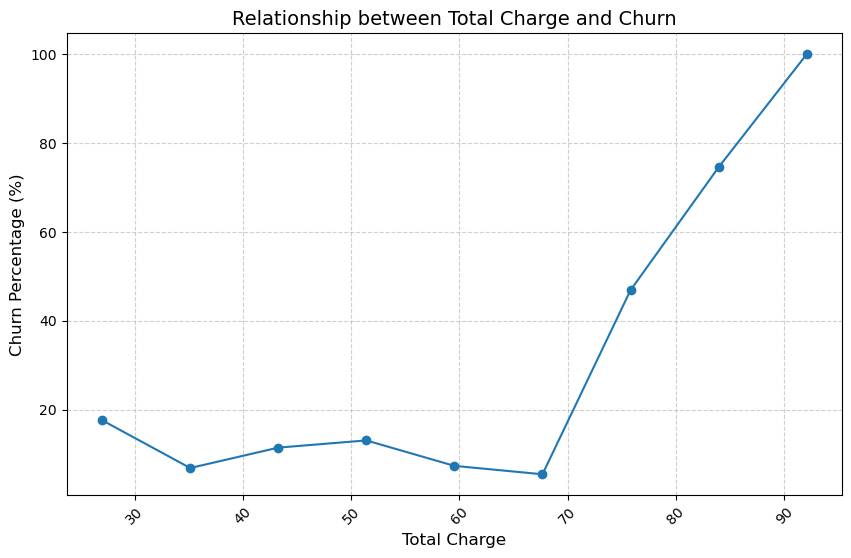

In [25]:
bins = np.linspace(df['total_charge'].min(), df['total_charge'].max(), 10)
labels = (bins[:-1] + bins[1:]) / 2
churn_by_charge = df.groupby(pd.cut(df['total_charge'], bins))['Churn'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(labels, churn_by_charge.values, marker='o')
plt.title('Relationship between Total Charge and Churn', fontsize=14)
plt.xlabel('Total Charge', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

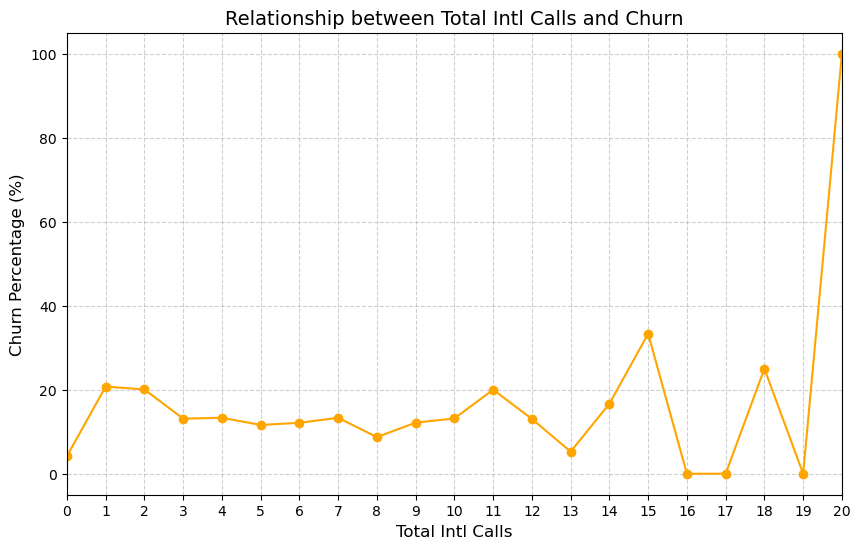

In [26]:
churn_by_intl_calls = df.groupby('total_intl_calls')['Churn'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(churn_by_intl_calls.index, churn_by_intl_calls.values, marker='o', color='orange')
plt.title('Relationship between Total Intl Calls and Churn', fontsize=14)
plt.xlabel('Total Intl Calls', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

max_value = df['total_intl_calls'].max()
plt.xlim(0, max_value)
plt.xticks(range(0, max_value + 1, 1))

plt.show()

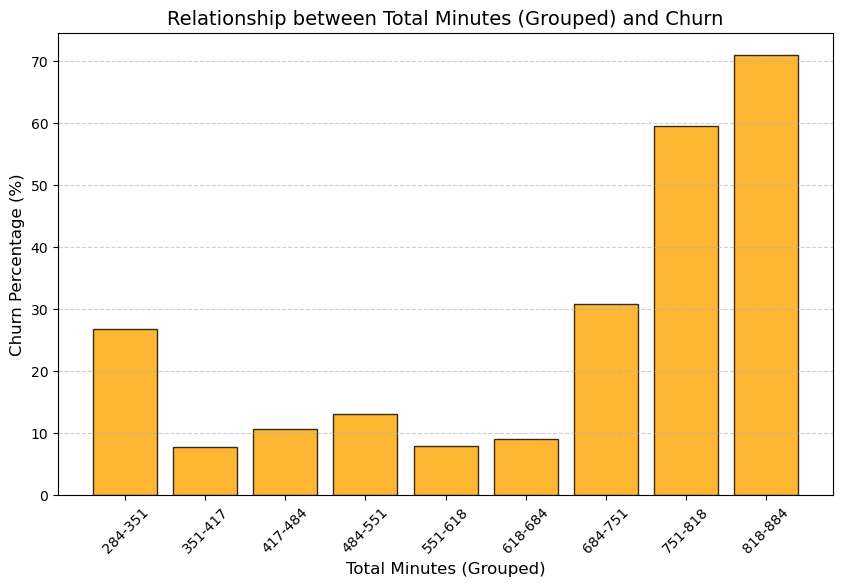

In [27]:
bins = np.linspace(df['total_minutes'].min(), df['total_minutes'].max(), 10)
bin_labels = [f"{int(bins[i])}-{int(bins[i+1])}" for i in range(len(bins)-1)]

churn_by_bin = (
    df.groupby(pd.cut(df['total_minutes'], bins))['Churn'].mean() * 100
)

plt.figure(figsize=(10, 6))
plt.bar(bin_labels, churn_by_bin.values, color='orange', edgecolor='black', alpha=0.8)
plt.title('Relationship between Total Minutes (Grouped) and Churn', fontsize=14)
plt.xlabel('Total Minutes (Grouped)', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()

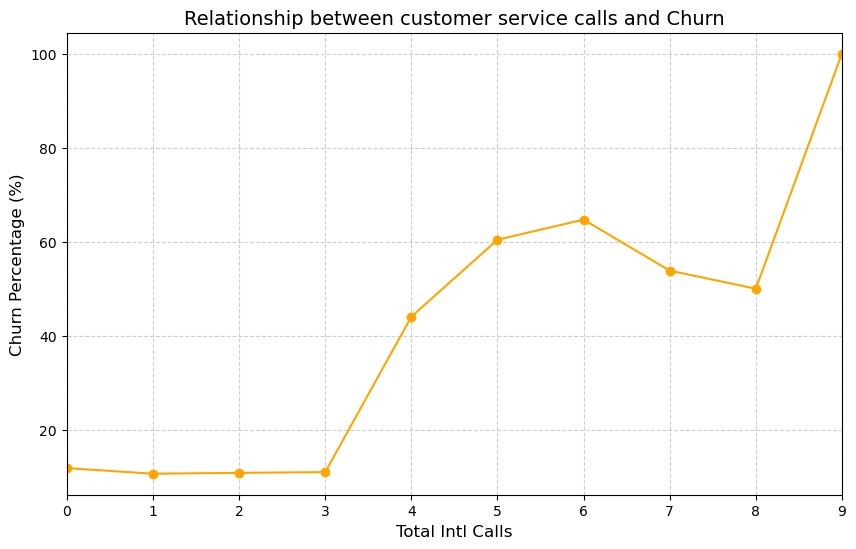

In [28]:
churn_by_number_customer_service_calls = df.groupby('number_customer_service_calls')['Churn'].mean() * 100

plt.figure(figsize=(10, 6))
plt.plot(churn_by_number_customer_service_calls.index, churn_by_number_customer_service_calls.values, marker='o', color='orange')
plt.title('Relationship between customer service calls and Churn', fontsize=14)
plt.xlabel('Total Intl Calls', fontsize=12)
plt.ylabel('Churn Percentage (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

max_value = df['number_customer_service_calls'].max()
plt.xlim(0, max_value)
plt.xticks(range(0, max_value + 1, 1))

plt.show()

## 5. SPLITTING DATA FOR MODEL TRAINING

Split the dataset into train (80%) and test (20%):

In [29]:
y = df['Churn']
X = df.drop(columns=['Churn'])


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)

In [30]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 6. MODEL SELECTION & TRAINING

We will demonstrate using a RandomForestClassifier:

In [31]:
rf = RandomForestClassifier(random_state=42)

Hyperparameter tuning with GridSearch, for demonstration:

In [32]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train_scaled, y_train)
best_rf = grid_search.best_estimator_

print("\nBest Parameters found by GridSearchCV:", grid_search.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits

Best Parameters found by GridSearchCV: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


## 7. MODEL EVALUATION

Evaluate the model on the training set and test set:

In [33]:
y_train_pred = best_rf.predict(X_train_scaled)
y_test_pred = best_rf.predict(X_test_scaled)

### 7.1. TRAINING SET EVALUATION

In [34]:
report = classification_report(y_train, y_train_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print("\nTRAINING SET RESULTS:")
report_df.round(2)


TRAINING SET RESULTS:


,precision,recall,f1-score,support
0,0.98,1.00,0.99,3434.00
1,1.00,0.87,0.93,566.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.99,0.93,0.96,4000.00
weighted avg,0.98,0.98,0.98,4000.00


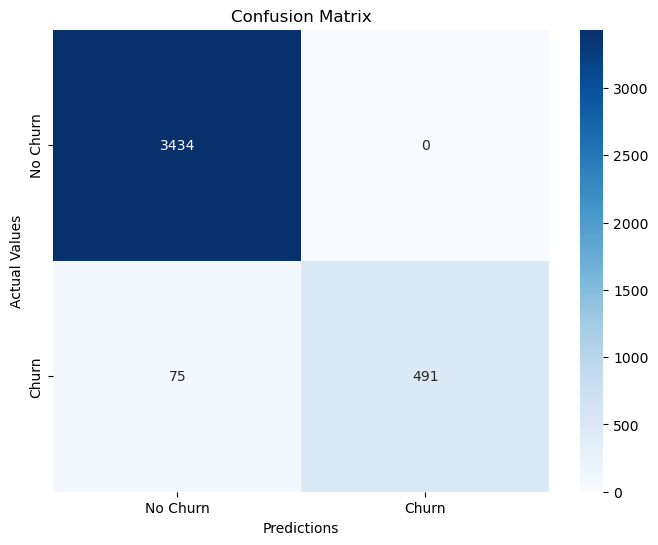

In [35]:
cm = confusion_matrix(y_train, y_train_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.show()

### 7.2. TEST SET EVALUATION

In [36]:
report = classification_report(y_test, y_test_pred, output_dict=True)

report_df = pd.DataFrame(report).transpose()

print("\nTEST SET RESULTS:")
report_df.round(2)


TEST SET RESULTS:


,precision,recall,f1-score,support
0,0.98,1.00,0.99,859.00
1,1.00,0.84,0.92,141.00
accuracy,0.98,0.98,0.98,0.98
macro avg,0.99,0.92,0.95,1000.00
weighted avg,0.98,0.98,0.98,1000.00


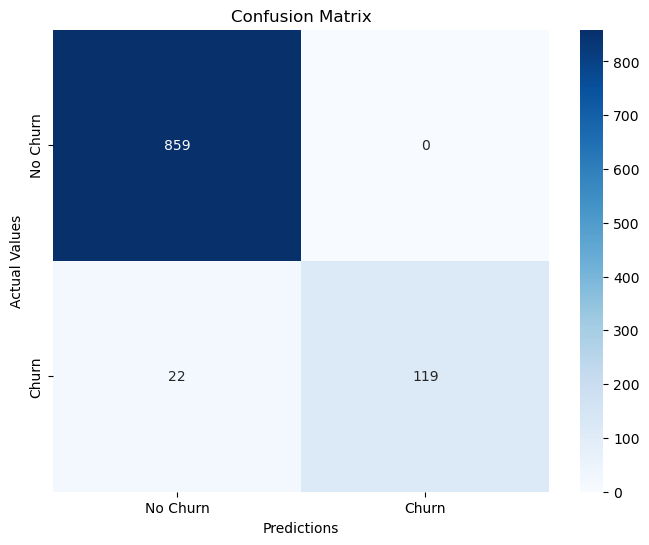

In [37]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.show()

Let's look at ROC AUC as well:

In [38]:
y_test_probs = best_rf.predict_proba(X_test_scaled)[:, 1]
roc_score = roc_auc_score(y_test, y_test_probs)
print("ROC AUC Score:", roc_score)

ROC AUC Score: 0.9210198234793879


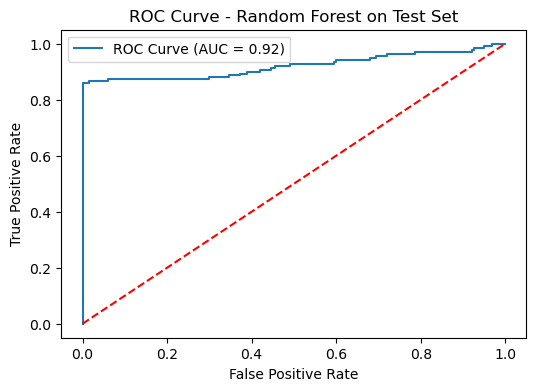

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_test_probs)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_score:.2f})")
plt.plot([0,1], [0,1], 'r--') # line for random model
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest on Test Set")
plt.legend()
plt.show()

## 8. IDENTIFY TOP 500 CUSTOMERS TO CONTACT

The client wants to focus efforts on the top 500 customers who are most likely to churn. We'll use the model's predicted probabilities for that:

In [40]:
all_probs = best_rf.predict_proba(scaler.transform(X))[:, 1]  # Probability of churn
df['churn_probability'] = all_probs

Now we have to take the phone number for each customer from the original dataset and merge it to our new dataset with the probabilities of churn:

In [41]:
df_original = pd.read_csv('churn_all.csv')

if len(df) == len(df_original):
    df['phone_number'] = df_original['phone_number'].values

    non_churn_customers = df[df['Churn'] == 0]
    
    df_sorted = non_churn_customers.sort_values(by='churn_probability', ascending=False)

    top_500_customers = df_sorted.head(500)
else:
    print("DataFrames do not have the same number of rows. Please verify the order.")

In [42]:
top_500_customers

,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_calls,total_intl_charge,number_customer_service_calls,total_minutes,total_calls,total_charge,avg_minutes_per_call,Churn,churn_probability,phone_number
974,510,0,1,31,135.9,90,23.10,271.0,84,23.04,...,7,2.57,6,595.5,270,56.77,2.205556,0,0.432693,383-5976
2622,510,0,1,16,144.8,105,24.62,206.2,111,17.53,...,2,3.13,4,618.0,335,56.77,1.844776,0,0.414649,342-7716
3509,415,0,1,26,205.4,68,34.92,115.0,115,9.78,...,2,2.54,5,544.5,315,56.90,1.728571,0,0.359887,406-8182
1741,415,0,0,0,255.3,114,43.40,194.6,83,16.54,...,5,1.00,3,730.2,280,73.39,2.607857,0,0.302834,363-1208
1821,408,0,1,39,270.4,99,45.97,245.1,110,20.83,...,7,4.16,1,639.8,329,75.86,1.944681,0,0.301096,396-6247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,408,0,0,0,166.2,102,28.25,217.6,112,18.50,...,2,3.56,4,617.2,284,60.22,2.173239,0,0.067577,346-1095
3107,408,0,0,0,157.6,92,26.79,198.3,87,16.86,...,4,2.46,1,729.9,289,62.53,2.525606,0,0.067469,385-6952
2209,510,1,0,0,171.7,78,29.19,144.5,86,12.28,...,3,1.84,3,480.9,273,50.42,1.761538,0,0.067407,394-2560
2010,408,0,0,0,105.9,151,18.00,189.6,142,16.12,...,7,3.43,0,479.1,367,45.24,1.305450,0,0.067363,332-6958


In [43]:

top_500_customers[['phone_number', 'total_charge', 'total_intl_charge', 'churn_probability']]

,phone_number,total_charge,total_intl_charge,churn_probability
974,383-5976,56.77,2.57,0.432693
2622,342-7716,56.77,3.13,0.414649
3509,406-8182,56.90,2.54,0.359887
1741,363-1208,73.39,1.00,0.302834
1821,396-6247,75.86,4.16,0.301096
...,...,...,...,...
1272,346-1095,60.22,3.56,0.067577
3107,385-6952,62.53,2.46,0.067469
2209,394-2560,50.42,1.84,0.067407
2010,332-6958,45.24,3.43,0.067363


## BUSINESS QUESTIONS 

### 1. Key characteristics of customers who are likely to churn

#### 1.1. High Total Usage (Minutes & Charges)

- From the “Relationship between Total Charge and Churn” chart, you can see that as customers’ total charges increase (especially above 70), their likelihood of leaving spikes dramatically.
- Similarly, the “Relationship between Total Minutes (Grouped) and Churn” chart shows higher churn rates for customers who use more minutes (over ~700 minutes).
- Why It Matters: Heavy users often face bigger bills and may become dissatisfied if they feel costs are too high, leading them to cancel.

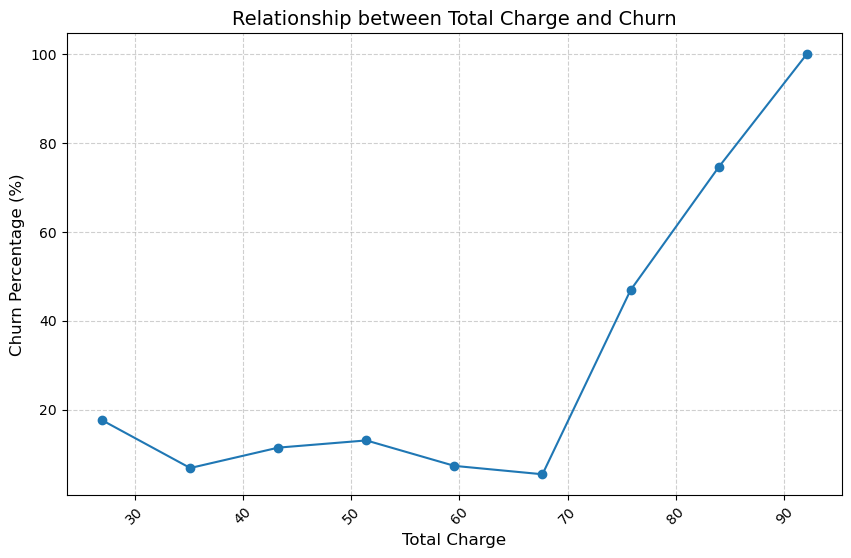

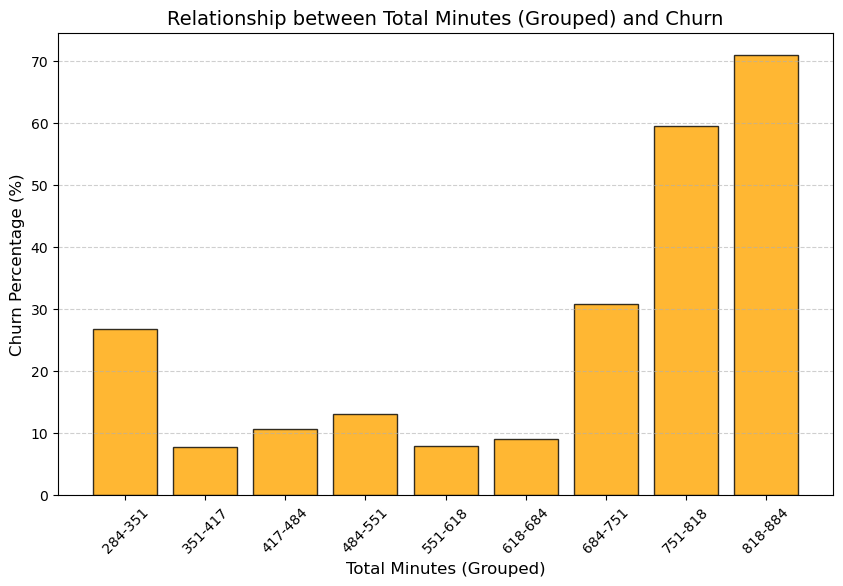

#### 1.2.Frequent Customer Service Calls

- The chart “Relationship between customer service calls and Churn” highlights that customers who make repeated calls to support (especially 4 or more times) are increasingly likely to leave.
- Why It Matters: Multiple support calls can signal unresolved problems, billing confusion, or service issues—driving frustration and, ultimately, churn.

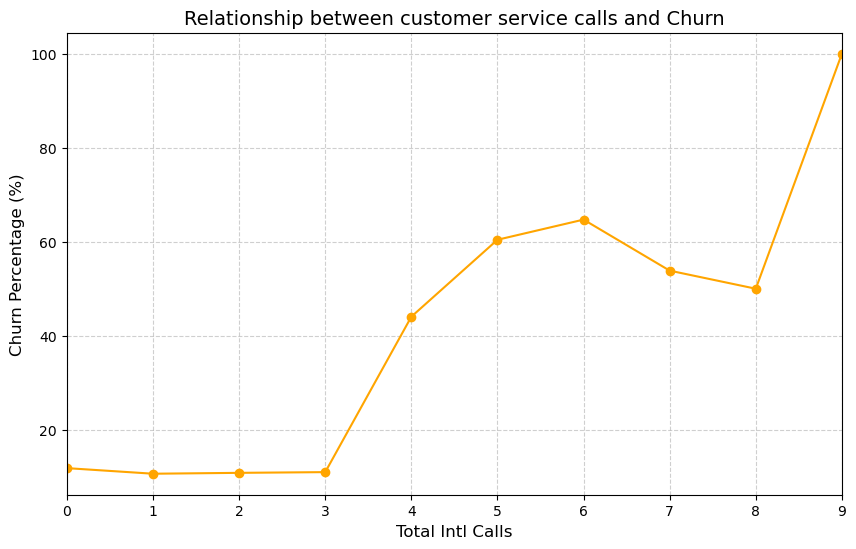

#### 1.3. Having an International Plan

- In “Churn Rate by International Plan,” we see that customers with an international plan are more likely to cancel compared to those without one.
- Why It Matters: International usage often leads to more complex billing or higher charges, which can contribute to dissatisfaction and a decision to switch providers.

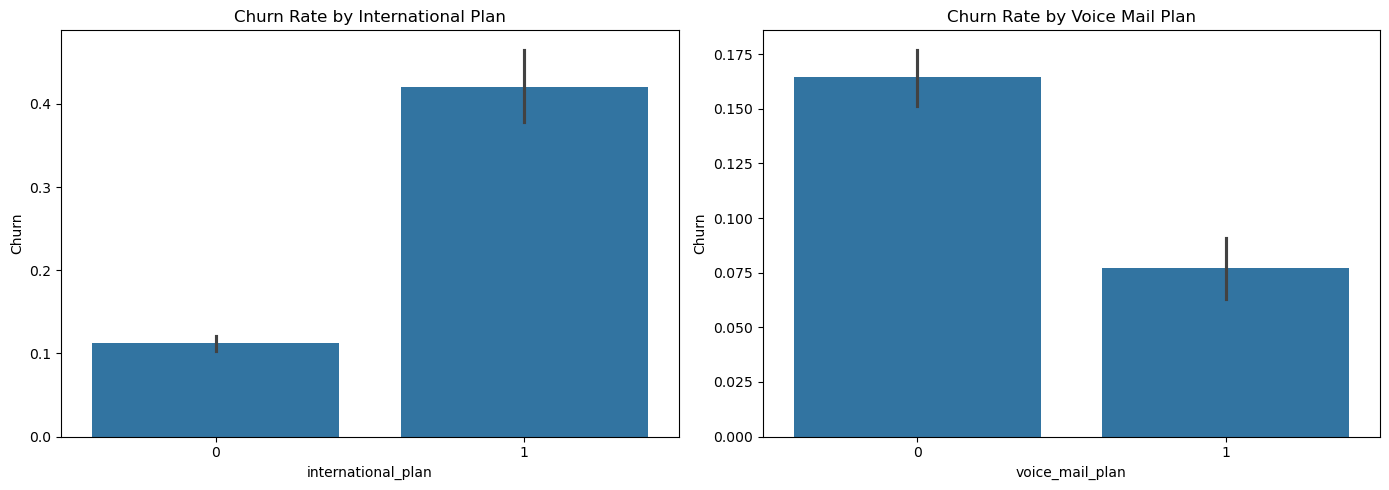

#### 1.4. Voice Mail Plan

- In “Churn Rate by Voice Mail Plan,” churn varies depending on whether customers have a voice mail plan. However, it is less influential than total usage or customer service calls.
- Why It Matters: Some features (like voice mail) may be less critical to overall churn, but still reflect customer preferences and satisfaction.

#### Putting It All Together

Customers who rack up high total minutes, pay high charges, contact customer service multiple times, and use international plans are at the greatest risk of leaving. These trends make sense because complex or higher bills often cause dissatisfaction, and unresolved issues (shown by multiple support calls) can push customers to end their contracts.

Focus on these key drivers when designing retention strategies—such as offering better billing options or more proactive customer service—to help lower the churn rate.

### 2. Predicting the customer’s likelihood of leaving: How We Know the Model Works Well

#### 2.1. High Accuracy and F1 Score

- In the Test Set Results table, you can see an overall accuracy of 98%, meaning the model correctly predicts almost all customers who will stay or leave.
- The F1-score for churners (the “1” category) is 0.92, which reflects a good balance between capturing actual churners (recall) and correctly identifying them without too many false alarms (precision).

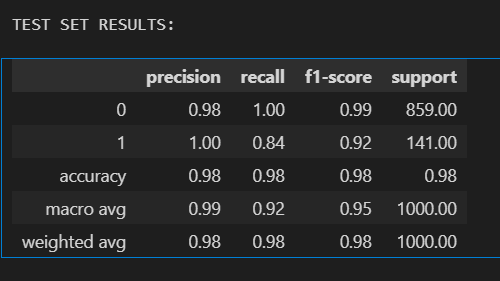

#### 2.2. Confusion Matrix

- This chart shows how many predictions were correct or incorrect for each category (churn vs. no churn).
- In the example provided, 859 customers who didn’t churn were predicted correctly, and 119 churners were correctly flagged, leaving only 22 churners that were missed.
- This means the model does an excellent job pinpointing which customers are at risk of leaving.

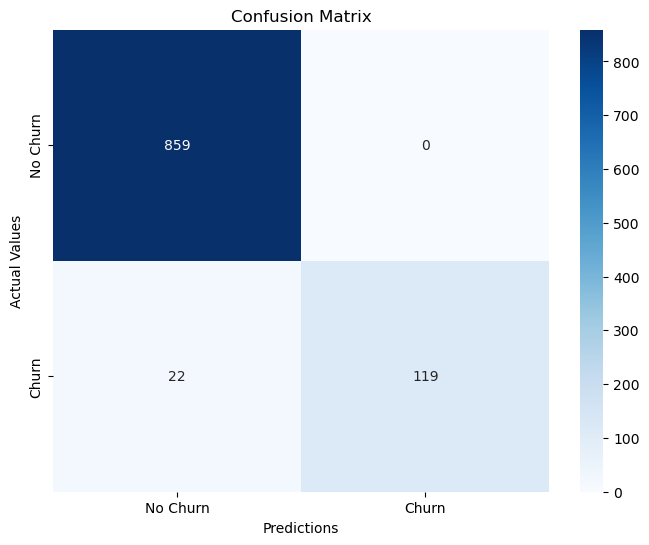

#### 2.3. ROC Curve (AUC = 0.92)

- The ROC curve is a way of visualizing the trade-off between catching churners (True Positive Rate) and accidentally flagging non-churners (False Positive Rate).
- An AUC of 0.92 (on a scale of 0 to 1) indicates the model distinguishes very well between those who stay and those who leave.

#### Why This Matters

Because the model provides a probability of churn for each customer, you can identify which subscribers are most at risk. By using these predictions:

Proactive Outreach: Offer special deals or personalized support to customers who are flagged as likely to leave.
Resource Allocation: Prioritize your retention efforts on the group with the highest churn probability to get the most impact.
Overall, these high accuracy and AUC results mean you can trust the model’s predictions to guide smarter business decisions and reduce customer turnover.

### 3. Identifying the Top 500 Customers to Contact First

After our model calculated a churn probability for every subscriber, we ranked all customers in order of highest to lowest likelihood of cancelling. We then selected the top 500 at-risk customers to prioritize.

#### Why Focus on These 500?

- Maximize Impact: by zeroing in on those most likely to leave, you can use your retention budget where it counts—potentially preventing a large share of departures.

- Efficient Resource Allocation: reaching out to all customers can be costly and time-consuming. Targeting the top 500 ensures you minimize churn while keeping support and marketing expenses in check.

- Combining Churn Probability with Key Metrics: as shown in the table with phone_number, total_charge, total_intl_charge, and churn_probability, these at-risk customers often have high charges (total or international). Focusing on them first can help safeguard some of your most profitable subscribers.

#### Takeaway

By contacting these 500 high-risk customers immediately—whether through special offers, discounts, or improved support—you stand the best chance of retaining them and reducing overall churn.

In [44]:
top_500_customers[['phone_number', 'total_charge', 'total_intl_charge', 'churn_probability']]

,phone_number,total_charge,total_intl_charge,churn_probability
974,383-5976,56.77,2.57,0.432693
2622,342-7716,56.77,3.13,0.414649
3509,406-8182,56.90,2.54,0.359887
1741,363-1208,73.39,1.00,0.302834
1821,396-6247,75.86,4.16,0.301096
...,...,...,...,...
1272,346-1095,60.22,3.56,0.067577
3107,385-6952,62.53,2.46,0.067469
2209,394-2560,50.42,1.84,0.067407
2010,332-6958,45.24,3.43,0.067363


### 4. Why Our Data-Driven Strategy Is Better than randomly contacting the business’ customers

- Higher Success Rate: by identifying and targeting the most at-risk customers first, we can significantly increase our chance of saving these relationships.
  
- Efficient Use of Resources: reaching out to everyone randomly can be costly. Our approach pinpoints the segment where retention efforts are most likely to pay off.
  
- Better Overall Retention: focusing on high-churn individuals means the company can retain more customers, ensuring a healthier subscriber base and revenue.

#### Key Takeaway
A random approach dilutes your efforts across all customers, while our churn probability model highlights exactly whom you should contact to get the best return on your retention campaigns.